<strong><span style = "fontsize:2.0;color:green"> Sales Example file analysis

imports

In [38]:
import sys
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt

file imports and standardisation

In [39]:
print('importing sales learning file...')
df_raw_sales_data = pd.read_csv('c:/Users/zicza/OneDrive/Desktop/python practise/sales_data_sample.csv', encoding='ISO-8859-1')
print('learing sales file imported.')
print(df_raw_sales_data.dtypes)
print(df_raw_sales_data.columns.dtype)



importing sales learning file...
learing sales file imported.
ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object
object


data clean function

In [40]:
#group countries into regions
def country_to_region(COUNTRY):
    if COUNTRY in ['France', 'Norway','Finland',
                   'Austria','UK','Spain','Sweden',
                   'Italy','Denmark','Belgium',
                   'Germany','Switzerland','Ireland']:
        return 'Europe'
    elif COUNTRY in ['USA','Canada']:
        return 'North America'
    elif COUNTRY in ['Austrailia']:
        return 'Oceania'
    elif COUNTRY in ['Singapore', 'Japan','Philippines']:
        return 'Asia'
    else:
        'Uknown'
    

initial sales summarisation (value, ave value by type, ave value by month)

In [41]:
ave_sales_value = np.mean(df_raw_sales_data['MSRP'])
unique_groups = np.unique(df_raw_sales_data['PRODUCTLINE'])

agg_functions = ['mean','median','sum','count']

df_raw_sales_data['ORDERDATE'] = pd.to_datetime(df_raw_sales_data['ORDERDATE'])
df_raw_sales_data['month_year'] = df_raw_sales_data['ORDERDATE'].dt.strftime('%y %B')
df_raw_sales_data['region'] = df_raw_sales_data['COUNTRY'].apply(country_to_region)

print(df_raw_sales_data['month_year'])

value_type_by_vehicle_type = df_raw_sales_data.groupby(['PRODUCTLINE'])['MSRP'].agg(agg_functions)
value_type_by_month_year = df_raw_sales_data.groupby(['month_year'])['MSRP'].agg(agg_functions)
value_type_by_country = df_raw_sales_data.groupby(['COUNTRY'])['MSRP'].agg(agg_functions)

value_by_vehicle_type_month_year = df_raw_sales_data.groupby(['PRODUCTLINE','month_year'])['MSRP'].agg(agg_functions)


print(ave_sales_value)
print(value_by_vehicle_type_month_year)


0       03 February
1            03 May
2           03 July
3         03 August
4        03 October
           ...     
2818    04 December
2819     05 January
2820       05 March
2821       05 March
2822         05 May
Name: month_year, Length: 2823, dtype: object
100.71555083244775
                                mean  median   sum  count
PRODUCTLINE  month_year                                  
Classic Cars 03 April     133.333333   145.0  1600     12
             03 August    135.200000   147.0  1352     10
             03 December  113.593750   117.0  3635     32
             03 February  172.000000   173.0   516      3
             03 January   129.800000   145.0  1298     10
...                              ...     ...   ...    ...
Vintage Cars 05 April      80.636364    68.0   887     11
             05 February   86.727273    87.5  1908     22
             05 January    89.409091    90.0  1967     22
             05 March      84.045455    85.0  1849     22
             05 May

plots for exploration

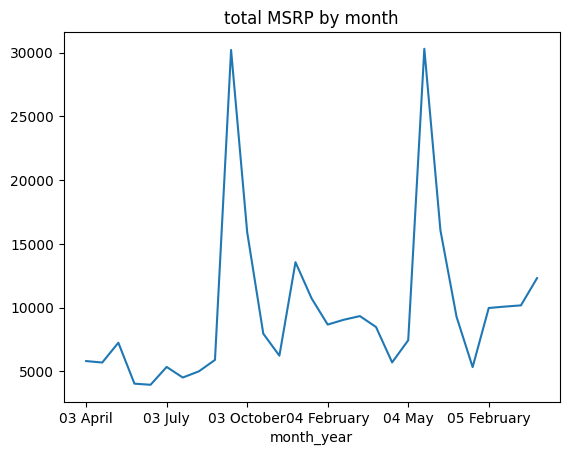

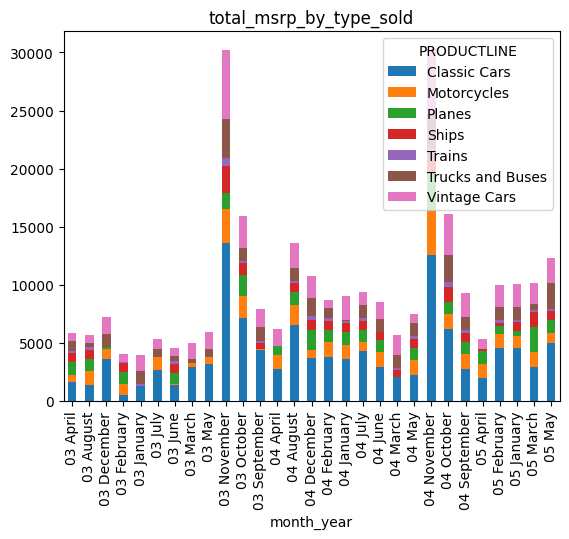

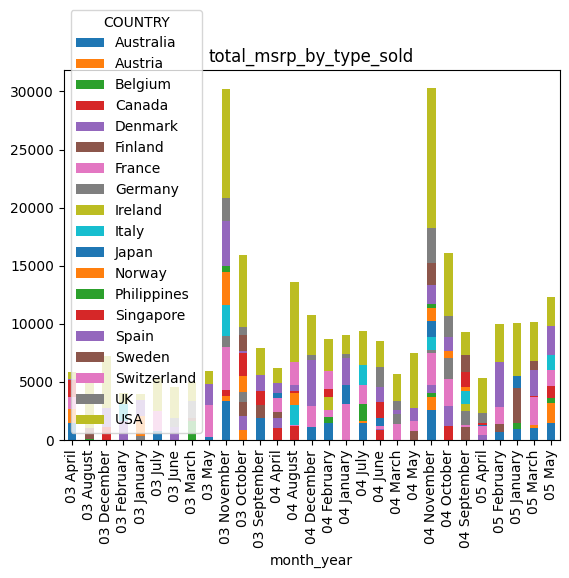

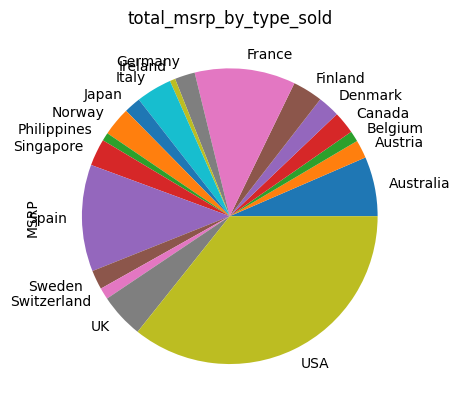

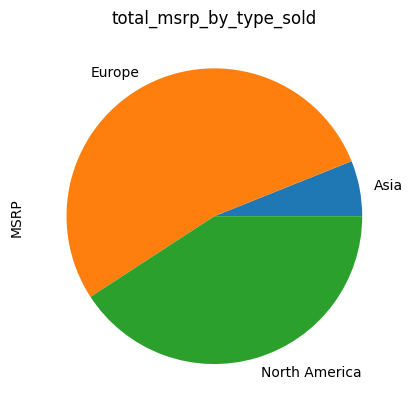

In [42]:

total_msrp_by_month = df_raw_sales_data.groupby(['month_year'])['MSRP'].sum()
total_value_type_by_month_year = df_raw_sales_data.groupby(['month_year','PRODUCTLINE'])['MSRP'].sum().unstack()
total_msrp_by_location_and_month = df_raw_sales_data.groupby(['month_year','COUNTRY'])['MSRP'].sum().unstack()
total_msrp_by_country = df_raw_sales_data.groupby(['COUNTRY'])['MSRP'].sum()
total_msrp_by_region = df_raw_sales_data.groupby(['region'])['MSRP'].sum()

ax = total_msrp_by_month.plot()
ax.set_title("total MSRP by month")
plt.show()

ax=total_value_type_by_month_year.plot(kind='bar',stacked=True)
ax.set_title("total_msrp_by_type_sold")
plt.show()

ax=total_msrp_by_location_and_month.plot(kind='bar',stacked=True)
ax.set_title("total_msrp_by_type_sold")
plt.show()

ax=total_msrp_by_country.plot(kind='pie')
ax.set_title("total_msrp_by_type_sold")
plt.show()

ax=total_msrp_by_region.plot(kind='pie')
ax.set_title("total_msrp_by_type_sold")
plt.show()